In [ ]:
!pip install prophet


In [ ]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [ ]:
# Initializing plotly:
import plotly.io as pio
pio.renderers.default = 'colab'

Importing the dataset and exploring it

In [ ]:
df = pd.read_csv("/content/TSLA.csv")

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


Data Visualization Using plotly express: Visualizing the Historical Performance of Tesla

In [ ]:
px.area(df, x = 'Date', y = 'Close')

In [ ]:
px.line(df, x = 'Date', y = 'Close')

In [ ]:
px.area(df, x = 'Date', y = 'Volume')

In [27]:
df['Date'] = pd.to_datetime(df['Date'])

# Group by year to reduce the number of x-axis values
df['Year'] = df['Date'].dt.year

# Create box plot with grouped years
px.box(df, x='Year', y='Volume')

Data Preparation

In [29]:
columns = ['Date', 'Close']
ndf = pd.DataFrame(df, columns=columns)

In [30]:
ndf

,Date,Close
0,2010-06-29,4.778000
1,2010-06-30,4.766000
2,2010-07-01,4.392000
3,2010-07-02,3.840000
4,2010-07-06,3.222000
...,...,...
2951,2022-03-18,905.390015
2952,2022-03-21,921.159973
2953,2022-03-22,993.979980
2954,2022-03-23,999.109985


In [31]:
prophet_df = ndf.rename(columns={'Date': 'ds', 'Close': 'y'})

In [32]:
prophet_df

,ds,y
0,2010-06-29,4.778000
1,2010-06-30,4.766000
2,2010-07-01,4.392000
3,2010-07-02,3.840000
4,2010-07-06,3.222000
...,...,...
2951,2022-03-18,905.390015
2952,2022-03-21,921.159973
2953,2022-03-22,993.979980
2954,2022-03-23,999.109985


Creating Facebook Prophet Model

In [33]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5fa073dc/moq9419u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5fa073dc/hvqhc877.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68939', 'data', 'file=/tmp/tmp5fa073dc/moq9419u.json', 'init=/tmp/tmp5fa073dc/hvqhc877.json', 'output', 'file=/tmp/tmp5fa073dc/prophet_modelr5w6_qzq/prophet_model-20250312042936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:29:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:29:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecasting

In [34]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [35]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-06-29,2.363789,-75.781127,51.470428,2.363789,2.363789,-12.904831,-12.904831,-12.904831,-0.144119,-0.144119,-0.144119,-12.760712,-12.760712,-12.760712,0.0,0.0,0.0,-10.541042
1,2010-06-30,2.372183,-75.467093,53.510486,2.372183,2.372183,-12.165828,-12.165828,-12.165828,0.007038,0.007038,0.007038,-12.172866,-12.172866,-12.172866,0.0,0.0,0.0,-9.793644
2,2010-07-01,2.380578,-72.762641,54.209052,2.380578,2.380578,-12.358172,-12.358172,-12.358172,-0.776423,-0.776423,-0.776423,-11.581749,-11.581749,-11.581749,0.0,0.0,0.0,-9.977594
3,2010-07-02,2.388973,-72.530854,49.238503,2.388973,2.388973,-12.589926,-12.589926,-12.589926,-1.591551,-1.591551,-1.591551,-10.998375,-10.998375,-10.998375,0.0,0.0,0.0,-10.200953
4,2010-07-06,2.422552,-69.872129,54.837892,2.422552,2.422552,-9.104097,-9.104097,-9.104097,-0.144119,-0.144119,-0.144119,-8.959979,-8.959979,-8.959979,0.0,0.0,0.0,-6.681545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316,2023-03-20,1473.224620,1389.385588,1527.247199,1448.290135,1499.271732,-15.894488,-15.894488,-15.894488,0.090559,0.090559,0.090559,-15.985047,-15.985047,-15.985047,0.0,0.0,0.0,1457.330133
3317,2023-03-21,1474.395466,1391.249225,1528.584827,1449.294749,1500.568070,-15.351382,-15.351382,-15.351382,-0.144119,-0.144119,-0.144119,-15.207264,-15.207264,-15.207264,0.0,0.0,0.0,1459.044084
3318,2023-03-22,1475.566313,1389.259890,1532.025018,1450.331485,1501.906933,-14.398795,-14.398795,-14.398795,0.007038,0.007038,0.007038,-14.405833,-14.405833,-14.405833,0.0,0.0,0.0,1461.167517
3319,2023-03-23,1476.737159,1386.993506,1536.967664,1451.415950,1503.267987,-14.370320,-14.370320,-14.370320,-0.776423,-0.776423,-0.776423,-13.593897,-13.593897,-13.593897,0.0,0.0,0.0,1462.366839


In [36]:
px.line(forecast, x='ds', y='yhat')

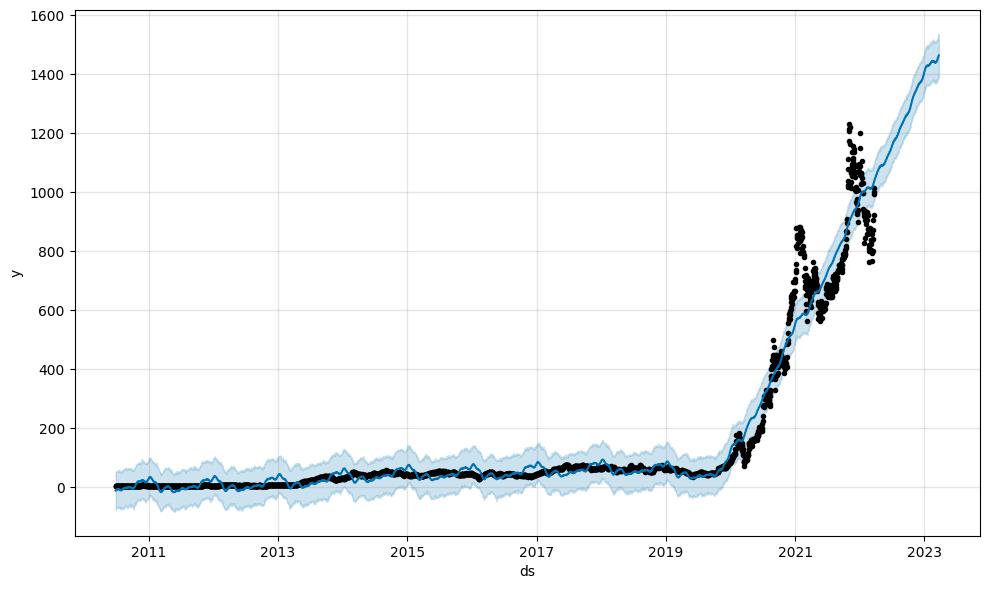

In [38]:
figure1 = m.plot(forecast, xlabel='ds', ylabel='y')

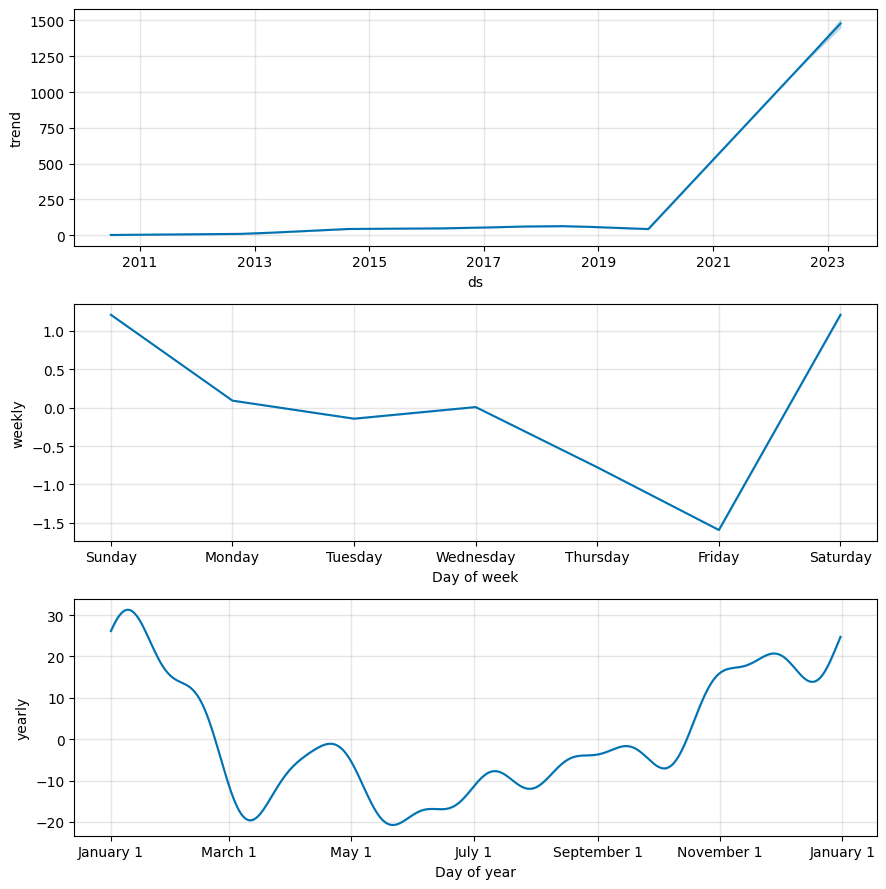

In [39]:
figure2 = m.plot_components(forecast)

Downloading Forecast Data

In [40]:
from google.colab import files
forecast.to_csv('forecast.csv', index=False)
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>